In [1]:
import os
import pandas as pd
import numpy as np

# Path to the directory containing the data files
data_dir = 'tc_data'

# Dictionary to store the dataframes
data_dict = {}

# Loop over all the files in the directory and load them into dataframes
for file_name in os.listdir(data_dir):
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Construct the full path to the file
        file_path = os.path.join(data_dir, file_name)
        
        # Load the CSV file into a dataframe
        df = pd.read_csv(file_path)
        
        # Add the dataframe to the dictionary with the filename as the key
        data_dict[file_name] = df

In [2]:
data_dict.keys()

dict_keys(['tech_companies_cash_flow.csv', 'tech_companies_earning_calendar_12months.csv', 'tech_companies_earning_calendar_6months.csv', 'tech_companies_earning.csv', 'tech_companies_balance_sheet.csv', 'tech_companies_earning_calendar_3months.csv', 'tech_companies_income_statements.csv'])

In [3]:
data_dict['tech_companies_cash_flow.csv']['netIncome']

0      29998000000
1      20721000000
2      19442000000
3      25010000000
4      34630000000
          ...     
276     3884000000
277     -393000000
278     4114000000
279     3872000000
280     3561000000
Name: netIncome, Length: 281, dtype: int64

In [4]:
# Loop through each dataframe in the dictionary
for key, value in data_dict.items():
    # Print the name of the dataframe
    print(f"Columns for {key}:")
    
    # Print the column names of the dataframe
    for col_name in value.columns:
        print(f" -> {col_name}")
    
    print("---")  # Separate each dataframe's columns with a line

Columns for tech_companies_cash_flow.csv:
 -> fiscalDateEnding
 -> reportedCurrency
 -> operatingCashflow
 -> paymentsForOperatingActivities
 -> proceedsFromOperatingActivities
 -> changeInOperatingLiabilities
 -> changeInOperatingAssets
 -> depreciationDepletionAndAmortization
 -> capitalExpenditures
 -> changeInReceivables
 -> changeInInventory
 -> profitLoss
 -> cashflowFromInvestment
 -> cashflowFromFinancing
 -> proceedsFromRepaymentsOfShortTermDebt
 -> paymentsForRepurchaseOfCommonStock
 -> paymentsForRepurchaseOfEquity
 -> paymentsForRepurchaseOfPreferredStock
 -> dividendPayout
 -> dividendPayoutCommonStock
 -> dividendPayoutPreferredStock
 -> proceedsFromIssuanceOfCommonStock
 -> proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet
 -> proceedsFromIssuanceOfPreferredStock
 -> proceedsFromRepurchaseOfEquity
 -> proceedsFromSaleOfTreasuryStock
 -> changeInCashAndCashEquivalents
 -> changeInExchangeRate
 -> netIncome
 -> Ticker
 -> Report
---
Columns for tech_companies_earni

In [5]:
data_dict['tech_companies_cash_flow.csv'][data_dict['tech_companies_cash_flow.csv']['Ticker'] == 'META']['dividendPayout']

120    None
121    None
122    None
123    None
124    None
125    None
126    None
127    None
128    None
129    None
130    None
131    None
132    None
133    None
134    None
135    None
136    None
137    None
138    None
139    None
Name: dividendPayout, dtype: object

---

In [6]:
tech_companies_earning_df = pd.read_csv('tc_data/tech_companies_earning.csv')
tech_companies_income_statements_df = pd.read_csv('tc_data/tech_companies_income_statements.csv')
tech_companies_balance_sheet_df = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
tech_companies_cash_flow_df = pd.read_csv('tc_data/tech_companies_cash_flow.csv')
bars_df = pd.read_csv('bars_final.csv')

# Extract the necessary data
earnings = tech_companies_earning_df[['Ticker', 'fiscalDateEnding', 'reportedEPS']]
income_statements = tech_companies_income_statements_df[['Ticker', 'fiscalDateEnding', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome']]
balance_sheet = tech_companies_balance_sheet_df[['Ticker', 'fiscalDateEnding', 'totalAssets', 'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal']]
cash_flow = tech_companies_cash_flow_df[['Ticker', 'fiscalDateEnding', 'operatingCashflow', 'capitalExpenditures']]

financial_data = earnings.merge(
    income_statements,
    on=['Ticker', 'fiscalDateEnding']
).merge(
    balance_sheet,
    on=['Ticker', 'fiscalDateEnding']
).merge(
    cash_flow,
    on=['Ticker', 'fiscalDateEnding']
)

financial_data = financial_data.rename(columns={'fiscalDateEnding': 't', 'Ticker': 'symbol'})
financial_data.head()

,symbol,t,reportedEPS,totalRevenue,grossProfit,operatingIncome,netIncome,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalShareholderEquity,shortLongTermDebtTotal,operatingCashflow,capitalExpenditures
0,AAPL,2022-12-31,1.88,116151000000,50332000000,36016000000,29998000000,346747000000,128777000000,137286000000,56727000000,111143000000,34005000000,3787000000
1,AAPL,2022-09-30,1.29,89319000000,38095000000,24894000000,20721000000,352755000000,135405000000,153982000000,50672000000,233256000000,24127000000,3289000000
2,AAPL,2022-06-30,1.20,82240000000,35885000000,23076000000,19442000000,336309000000,112292000000,129873000000,58107000000,119682000000,22892000000,2102000000
3,AAPL,2022-03-31,1.52,96587000000,42559000000,29979000000,25010000000,350662000000,118180000000,127508000000,67399000000,119999000000,28166000000,2514000000
4,AAPL,2021-12-31,2.10,123251000000,54243000000,41488000000,34630000000,381191000000,153154000000,147574000000,71932000000,122800000000,46966000000,2803000000


In [7]:
# Resample and forward fill the financial_data DataFrame
financial_data['t'] = pd.to_datetime(financial_data['t'])
financial_data['fiscalDate'] = financial_data['t']
financial_data = financial_data.set_index(['symbol', 't'])

financial_data_hourly = (
    financial_data.groupby('symbol')
    .apply(lambda x: x.reset_index(level=0, drop=True).resample('1H').ffill())
    .reset_index(level=0, drop=False)
)

In [8]:
financial_data_hourly = financial_data_hourly.reset_index()

financial_data_hourly['financial_data_age'] = (financial_data_hourly['t'] - financial_data_hourly['fiscalDate']).dt.total_seconds() / 3600
financial_data_hourly = financial_data_hourly.drop(columns=['fiscalDate'])

financial_data_hourly = financial_data_hourly.set_index(['symbol', 't'])
financial_data_hourly

reportedEPS  totalRevenue   grossProfit  \
symbol t                                                              
AAPL   2018-03-31 00:00:00       0.6825   61137000000   23422000000   
       2018-03-31 01:00:00       0.6825   61137000000   23422000000   
       2018-03-31 02:00:00       0.6825   61137000000   23422000000   
       2018-03-31 03:00:00       0.6825   61137000000   23422000000   
       2018-03-31 04:00:00       0.6825   61137000000   23422000000   
...                                 ...           ...           ...   
XOM    2022-12-30 20:00:00       4.4500  112070000000  109592000000   
       2022-12-30 21:00:00       4.4500  112070000000  109592000000   
       2022-12-30 22:00:00       4.4500  112070000000  109592000000   
       2022-12-30 23:00:00       4.4500  112070000000  109592000000   
       2022-12-31 00:00:00       3.4000   95429000000   91753000000   

                            operatingIncome    netIncome   totalAssets  \
symbol t                                                                 
AAPL   2018-03-31 00:00:00      15894000000  13822000000  367502000000   
       2018-03-31 01:00:00      15894000000  13822000000  367502000000   
       2018-03-31 02:00:00      15894000000  13822000000  367502000000   
       2018-03-31 03:00:00      15894000000  13822000000  367502000000   
       2018-03-31 04:00:00      15894000000  13822000000  367502000000   
...                                     ...          ...           ...   
XOM    2022-12-30 20:00:00     107050000000  19660000000  370152000000   
       2022-12-30 21:00:00     107050000000  19660000000  370152000000   
       2022-12-30 22:00:00     107050000000  19660000000  370152000000   
       2022-12-30 23:00:00     107050000000  19660000000  370152000000   
       2022-12-31 00:00:00      88039000000  12750000000  369067000000   

                            totalCurrentAssets  totalCurrentLiabilities  \
symbol t                                                                  
AAPL   2018-03-31 00:00:00        130053000000              89320000000   
       2018-03-31 01:00:00        130053000000              89320000000   
       2018-03-31 02:00:00        130053000000              89320000000   
       2018-03-31 03:00:00        130053000000              89320000000   
       2018-03-31 04:00:00        130053000000              89320000000   
...                                        ...                      ...   
XOM    2022-12-30 20:00:00         99289000000              74057000000   
       2022-12-30 21:00:00         99289000000              74057000000   
       2022-12-30 22:00:00         99289000000              74057000000   
       2022-12-30 23:00:00         99289000000              74057000000   
       2022-12-31 00:00:00         97631000000              69045000000   

                            totalShareholderEquity shortLongTermDebtTotal  \
symbol t                                                                    
AAPL   2018-03-31 00:00:00            126878000000           122881000000   
       2018-03-31 01:00:00            126878000000           122881000000   
       2018-03-31 02:00:00            126878000000           122881000000   
       2018-03-31 03:00:00            126878000000           122881000000   
       2018-03-31 04:00:00            126878000000           122881000000   
...                                            ...                    ...   
XOM    2022-12-30 20:00:00            186100000000            45428000000   
       2022-12-30 21:00:00            186100000000            45428000000   
       2022-12-30 22:00:00            186100000000            45428000000   
       2022-12-30 23:00:00            186100000000            45428000000   
       2022-12-31 00:00:00            195049000000            14495000000   

                            operatingCashflow capitalExpenditures  \
symbol t                                                            
AAPL   2018-03-31 00:00:0

In [9]:
bars_df = pd.read_csv('bars_final.csv')
bars_df = bars_df.drop(columns=['Unnamed: 0'])
bars_df['t'] = pd.to_datetime(bars_df['t'])
bars_df = bars_df.set_index(['symbol', 't'])
bars_df

o         h         l         c  \
symbol t                                                                 
AAPL   2015-12-01 09:00:00+00:00  118.88  118.9400  118.6000  118.6500   
       2015-12-01 10:00:00+00:00  118.65  118.7200  118.5000  118.7200   
       2015-12-01 11:00:00+00:00  118.71  118.9900  118.7100  118.9000   
       2015-12-01 12:00:00+00:00  118.88  118.9800  118.7600  118.9400   
       2015-12-01 13:00:00+00:00  118.88  119.0000  118.6000  118.6300   
...                                  ...       ...       ...       ...   
XOM    2023-03-31 19:00:00+00:00  109.31  109.7000  109.2850  109.5400   
       2023-03-31 20:00:00+00:00  109.66  109.6909  109.4334  109.6909   
       2023-03-31 21:00:00+00:00  109.69  109.7000  109.4800  109.5001   
       2023-03-31 22:00:00+00:00  109.66  109.6600  109.5100  109.5100   
       2023-03-31 23:00:00+00:00  109.49  109.6000  109.4900  109.6000   

                                        v      n          vw      diff  \
symbol t                                                                 
AAPL   2015-12-01 09:00:00+00:00     5825     15  118.696799       NaN   
       2015-12-01 10:00:00+00:00     7077     24  118.585340  0.999061   
       2015-12-01 11:00:00+00:00    14956     72  118.858641  1.002305   
       2015-12-01 12:00:00+00:00    24677    129  118.857629  0.999991   
       2015-12-01 13:00:00+00:00    95036    309  118.732677  0.998949   
...                                   ...    ...         ...       ...   
XOM    2023-03-31 19:00:00+00:00  3865118  35343  109.490546  0.999820   
       2023-03-31 20:00:00+00:00  3970345    161  109.659931  1.001547   
       2023-03-31 21:00:00+00:00    10750     52  109.526528  0.998783   
       2023-03-31 22:00:00+00:00      140      2  109.535714  1.000084   
       2023-03-31 23:00:00+00:00      550      5  109.574455  1.000354   

                                    diff12         s  ...     lavgv      lavm  \
symbol t                                              ...                       
AAPL   2015-12-01 09:00:00+00:00  0.988678       NaN  ...  5.961864  5.961864   
       2015-12-01 10:00:00+00:00  0.988987       NaN  ...  5.811694  5.886553   
       2015-12-01 11:00:00+00:00  0.986588  0.002294  ...  5.623587  5.798371   
       2015-12-01 12:00:00+00:00  0.986170  0.001669  ...  5.504554  5.724254   
       2015-12-01 13:00:00+00:00  0.989365  0.001556  ...  5.567004  5.692425   
...                                    ...       ...  ...       ...       ...   
XOM    2023-03-31 19:00:00+00:00       NaN  0.004055  ...  4.537190  4.910765   
       2023-03-31 20:00:00+00:00       NaN  0.004044  ...  5.466485  4.914093   
       2023-03-31 21:00:00+00:00       NaN  0.004034  ...  5.443974  4.917266   
       2023-03-31 22:00:00+00:00       NaN  0.004022  ...  5.244727  4.919227   
       2023-03-31 23:00:00+00:00       NaN  0.004010  ...  5.154019  4.920632   

                                      lavs      avgv      ewm_12      ewm_26  \
symbol t                                                                       
AAPL   2015-12-01 09:00:00+00:00       NaN       NaN  118.650000  118.650000   
       2015-12-01 10:00:00+00:00  0.106187 -0.704983  118.687917  118.686346   
       2015-12-01 11:00:00+00:00  0.169530 -1.030991  118.770693  118.763110   
       2015-12-01 12:00:00+00:00  0.202026 -1.087482  118.824136  118.812561   
       2015-12-01 13:00:00+00:00  0.188438 -0.665582  118.771390  118.770224   
...                                    ...       ...         ...         ...   
XOM    2023-03-31 19:00:00+00:00  0.364153 -1.025873  109.485508  109.241869   
       2023-03-31 20:00:00+00:00  0.365592  1.510953  109.517107  109.275130   
       2023-03-31 21:00:00+00:00  0.366788  1.436002  109.514490  109.291795   
       2023-03-31 22:00:00+00:00  0.366562  0.887982  109.513800  109.307958   
       2023-03-31 23:00:00+00:00  0.365913  0.637821  109.527061  109.329591   

                  

In [10]:
# Check the data types of the timestamp columns
print(f"Data type of 't' column in bars_df: {bars_df.index.get_level_values('t').dtype}")
print(f"Data type of 't' column in financial_data: {financial_data_hourly.index.get_level_values('t').dtype}")

Data type of 't' column in bars_df: datetime64[ns, UTC]
Data type of 't' column in financial_data: datetime64[ns]


In [11]:
bars_df = bars_df.reset_index()
bars_df['t'] = bars_df['t'].dt.tz_convert(None)

# Set the 't' column as the index
bars_df = bars_df.set_index(['symbol', 't'])

# Check the data types of the timestamp columns again
print(f"Data type of 't' column in bars_df: {bars_df.index.get_level_values('t').dtype}")
print(f"Data type of 't' column in financial_data: {financial_data_hourly.index.get_level_values('t').dtype}")

Data type of 't' column in bars_df: datetime64[ns]
Data type of 't' column in financial_data: datetime64[ns]


In [12]:
merged_data = bars_df.merge(financial_data_hourly, left_index=True, right_index=True, how='left')
merged_data = merged_data.reset_index()
merged_data = merged_data.groupby('symbol').apply(lambda group: group.ffill()).dropna()
data = merged_data
data

,symbol,t,o,h,l,c,v,n,vw,diff,...,operatingIncome,netIncome,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalShareholderEquity,shortLongTermDebtTotal,operatingCashflow,capitalExpenditures,financial_data_age
9224,AAPL,2018-04-02 08:00:00,167.60,167.9100,167.4000,167.8000,7876,48,167.739653,0.997441,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,56.0
9225,AAPL,2018-04-02 09:00:00,167.80,167.8000,167.7000,167.7500,7690,13,167.711353,0.999831,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,57.0
9226,AAPL,2018-04-02 10:00:00,168.07,168.1900,167.9000,167.9000,7975,67,168.095232,1.002289,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,58.0
9227,AAPL,2018-04-02 11:00:00,168.00,168.0000,167.1600,167.2000,57956,300,167.468096,0.996269,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,59.0
9228,AAPL,2018-04-02 12:00:00,167.25,167.9000,167.2100,167.8500,74222,521,167.581143,1.000675,...,1.589400e+10,1.382200e+10,3.675020e+11,1.300530e+11,8.932000e+10,1.268780e+11,122881000000,1.513000e+10,4041000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375113,XOM,2023-03-31 19:00:00,109.31,109.7000,109.2850,109.5400,3865118,35343,109.490546,0.999820,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
375114,XOM,2023-03-31 20:00:00,109.66,109.6909,109.4334,109.6909,3970345,161,109.659931,1.001547,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
375115,XOM,2023-03-31 21:00:00,109.69,109.7000,109.4800,109.5001,10750,52,109.526528,0.998783,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0
375116,XOM,2023-03-31 22:00:00,109.66,109.6600,109.5100,109.5100,140,2,109.535714,1.000084,...,8.803900e+10,1.275000e+10,3.690670e+11,9.763100e+10,6.904500e+10,1.950490e+11,14495000000,1.762100e+10,5783000000,0.0


---

In [13]:
data['symbol'].unique()

array(['AAPL', 'AMZN', 'BABA', 'BAC', 'CVX', 'GOOG', 'JPM', 'KO', 'META',
       'MSFT', 'NVDA', 'PFE', 'TSLA', 'XOM'], dtype=object)

In [14]:
for col in ['shortLongTermDebtTotal', 'capitalExpenditures']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [15]:
data['P/E'] = data['vw'] / data['reportedEPS']
data['P/S'] = data['vw'] / (data['totalRevenue'] / data['totalShareholderEquity'])
data['P/B'] = data['vw'] / (data['totalShareholderEquity'] / data['totalShareholderEquity'])
# data['Dividend_Yield'] = None  # Assuming no dividend data available

data['EPS_Growth'] = data['reportedEPS'].pct_change()
data['EPS_Growth'][data['EPS_Growth'] == 0] = None
data['EPS_Growth'] = data.groupby('symbol')['EPS_Growth'].apply(lambda group: group.ffill())

data['ROE'] = data['netIncome'] / data['totalShareholderEquity']
data['ROA'] = data['netIncome'] / data['totalAssets']
data['Gross_Margin'] = data['grossProfit'] / data['totalRevenue']
data['Operating_Margin'] = data['operatingIncome'] / data['totalRevenue']
data['Net_Profit_Margin'] = data['netIncome'] / data['totalRevenue']
data['Current_Ratio'] = data['totalCurrentAssets'] / data['totalCurrentLiabilities']
data['Debt_to_Equity'] = data['shortLongTermDebtTotal'] / data['totalShareholderEquity']
data['FCF'] = data['operatingCashflow'] - data['capitalExpenditures']


/var/folders/4z/l7kc3ncn7g3628qd59lkh1km0000gn/T/ipykernel_2986/744344841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EPS_Growth'][data['EPS_Growth'] == 0] = None


In [16]:
data = data.set_index(['symbol', 't'])

<AxesSubplot:xlabel='symbol,t'>

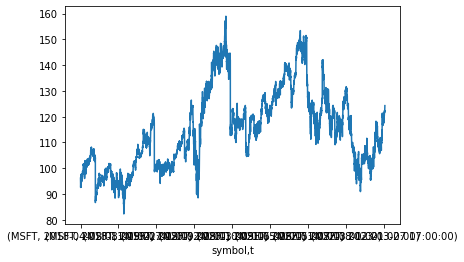

In [17]:
data.groupby('symbol').get_group('MSFT')['P/E'].abs().plot()

In [18]:
df_spy = pd.read_csv('bars_spy.csv')

df_spy['t'] = pd.to_datetime(df_spy['t'])
df_spy['t'] = df_spy['t'].dt.tz_convert(None)

df_spy = df_spy.drop(columns=['symbol', 'o', 'h', 'c', 'l', 'v', 'n'])
df_spy = df_spy.rename(columns={'vw': 'spy_value'})
df_spy = df_spy.set_index(['t'])
df_spy.head()

,spy_value
t,
2015-12-01 09:00:00,209.322606
2015-12-01 10:00:00,209.214253
2015-12-01 11:00:00,209.526441
2015-12-01 12:00:00,209.460429
2015-12-01 13:00:00,209.429479


In [19]:
data = data.reset_index().merge(df_spy, how='left', on='t').set_index(['t', 'symbol'])
data.reset_index()

,t,symbol,o,h,l,c,v,n,vw,diff,...,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF,spy_value
0,2018-04-02 08:00:00,AAPL,167.60,167.9100,167.4000,167.8000,7876,48,167.739653,0.997441,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,262.841590
1,2018-04-02 09:00:00,AAPL,167.80,167.8000,167.7000,167.7500,7690,13,167.711353,0.999831,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,262.854929
2,2018-04-02 10:00:00,AAPL,168.07,168.1900,167.9000,167.9000,7975,67,168.095232,1.002289,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,263.025263
3,2018-04-02 11:00:00,AAPL,168.00,168.0000,167.1600,167.2000,57956,300,167.468096,0.996269,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,262.403280
4,2018-04-02 12:00:00,AAPL,167.25,167.9000,167.2100,167.8500,74222,521,167.581143,1.000675,...,NaN,0.108939,0.037611,0.383107,0.259974,0.226082,1.456034,0.968497,1.108900e+10,262.629090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254260,2023-03-31 19:00:00,XOM,109.31,109.7000,109.2850,109.5400,3865118,35343,109.490546,0.999820,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,408.133356
254261,2023-03-31 20:00:00,XOM,109.66,109.6909,109.4334,109.6909,3970345,161,109.659931,1.001547,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,409.075813
254262,2023-03-31 21:00:00,XOM,109.69,109.7000,109.4800,109.5001,10750,52,109.526528,0.998783,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,409.581602
254263,2023-03-31 22:00:00,XOM,109.66,109.6600,109.5100,109.5100,140,2,109.535714,1.000084,...,-0.235955,0.065368,0.034547,0.961479,0.922560,0.133607,1.414020,0.074315,1.183800e+10,409.534768


In [20]:
list(data.columns)

['o',
 'h',
 'l',
 'c',
 'v',
 'n',
 'vw',
 'diff',
 'diff12',
 's',
 's12',
 'emaS',
 'emaM',
 'emaL',
 'ema12L',
 'std',
 'pc',
 'pc12',
 'mvS',
 'mvL',
 'mnS',
 'mnL',
 'rsi',
 'rsid',
 'rlmS',
 'rlmL',
 'rlmD',
 'obv',
 'obvmS',
 'obvmL',
 'obvsL',
 'obvSH',
 'lavgv',
 'lavm',
 'lavs',
 'avgv',
 'ewm_12',
 'ewm_26',
 'macd',
 'signal',
 'macd_std',
 'macds',
 'reportedEPS',
 'totalRevenue',
 'grossProfit',
 'operatingIncome',
 'netIncome',
 'totalAssets',
 'totalCurrentAssets',
 'totalCurrentLiabilities',
 'totalShareholderEquity',
 'shortLongTermDebtTotal',
 'operatingCashflow',
 'capitalExpenditures',
 'financial_data_age',
 'P/E',
 'P/S',
 'P/B',
 'EPS_Growth',
 'ROE',
 'ROA',
 'Gross_Margin',
 'Operating_Margin',
 'Net_Profit_Margin',
 'Current_Ratio',
 'Debt_to_Equity',
 'FCF',
 'spy_value']

In [21]:
data.drop(columns=[
    'reportedEPS', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome', 'totalAssets',
    'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal',
    'operatingCashflow', 'capitalExpenditures'
]).to_csv('data_project_vgm.csv')

Here are 10 additional financial metrics that can be calculated using the additional columns in Python:

1. Enterprise value (EV):
```
market_cap = ? # This would need to be obtained from a separate data source
total_debt = df['proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet'] + df['dividendPayoutPreferredStock']
cash_and_cash_equivalents = df['cashAndCashEquivalentsAtCarryingValue']
ev = market_cap + total_debt - cash_and_cash_equivalents
```

2. Free cash flow (FCF):
```
operating_cash_flow = df['changeInOperatingLiabilities'] + df['changeInOperatingAssets']
capital_expenditures = df['propertyPlantEquipment'] - df['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
```

3. Price-to-sales (P/S) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
revenue_per_share = df['revenues'] / df['Ticker']
ps_ratio = market_price_per_share / revenue_per_share
```

4. Debt-to-asset ratio:
```
total_debt = df['proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet'] + df['dividendPayoutPreferredStock']
total_assets = df['totalAssets']
debt_to_asset_ratio = total_debt / total_assets
```

5. Return on invested capital (ROIC):
```
ebit = df['ebit']
tax_rate = ? # This would need to be obtained from a separate data source
invested_capital = df['totalAssets'] - df['totalCurrentLiabilities'] - ((df['totalAssets'] - df['totalCurrentLiabilities']) - df['totalLiabilities']) + df['accumulatedDepreciationAmortizationPPE'] + df['intangibleAssets']
roic = (ebit * (1 - tax_rate)) / invested_capital
```

6. Price-to-cash flow (P/CF) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
operating_cash_flow_per_share = df['changeInOperatingLiabilities'] / df['Ticker']
pcf_ratio = market_price_per_share / operating_cash_flow_per_share
```

7. Return on invested assets (ROIA):
```
gross_profit = df['grossProfit']
interest_and_debt_expense = df['interestAndDebtExpense']
invested_assets = df['propertyPlantEquipment'] + df['intangibleAssets'] + df['shortTermInvestments'] + df['longTermInvestments']
roia = (gross_profit - interest_and_debt_expense) / invested_assets
```

8. Price-to-book (P/B) ratio:
```
market_price_per_share = ? # This would need to be obtained from a separate data source
book_value_per_share = df['totalShareholderEquity'] / df['commonStockSharesOutstanding']
pb_ratio = market_price_per_share / book_value_per_share
```

9. Gross margin:
```
gross_profit = df['grossProfit']
revenue = df['totalRevenue']
gross_margin = gross_profit / revenue
```

10. Inventory turnover ratio:
```
cost_of_goods_sold = df['costofGoodsAndServicesSold']
average_inventory = (df['inventory'] + df['inventory'].shift(1)) / 2
inventory_turnover_ratio = cost_of_goods_sold / average_inventory
``` 

Note that some of these metrics may require additional information such as market price per share, tax rate or currency exchange rates, which would need to be obtained from another data source. Also, this is not an exhaustive list and there are many other financial metrics that can be calculated using the provided attributes.

---

# DCF calculation

In [151]:
# DCF calculation

import pandas as pd
import numpy as np

ticker = 'AAPL'

# Load data from CSV files
earning_calendar_12months = pd.read_csv('tc_data/tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tc_data/tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tc_data/tech_companies_earning_calendar_3months.csv')
income_statements = pd.read_csv('tc_data/tech_companies_income_statements.csv')
balance_sheet = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
cash_flow = pd.read_csv('tc_data/tech_companies_cash_flow.csv')

df_bars = pd.read_csv('bars_final.csv')
df_spy = pd.read_csv('bars_spy.csv')

"""
earning_calendar_12months -> 12m
earning_calendar_6months -> 6m
earning_calendar_3months -> 3m
income_statements -> 3m
balance_sheet -> 3m
cash_flow -> 3m
df_bars -> 1h
"""

earning_calendar_12months = earning_calendar_12months[earning_calendar_12months['symbol'] == ticker]
earning_calendar_6months = earning_calendar_6months[earning_calendar_6months['symbol'] == ticker]
earning_calendar_3months = earning_calendar_3months[earning_calendar_3months['symbol'] == ticker]
income_statements = income_statements[income_statements['Ticker'] == ticker]
balance_sheet = balance_sheet[balance_sheet['Ticker'] == ticker]
cash_flow = cash_flow[cash_flow['Ticker'] == ticker]
df_bars = df_bars[df_bars['symbol'] == ticker]

In [152]:
merged_data = pd.merge(df_bars, df_spy, on='t', how='left')
merged_data.head()

market_variance = merged_data['c_y'].pct_change().var()
covariance = merged_data['c_x'].pct_change().cov(merged_data['c_y'].pct_change())
beta = covariance / market_variance

print('Beta value is:', beta)

Beta value is: 1.1671881399366402


In [153]:
# Define variables for DCF analysis
risk_free_rate = 0.02 # Can be adjusted based on current bond rates
market_return_rate = 0.08 # Can be adjusted based on historical market returns
tax_rate = 0.21 # Can be adjusted based on effective corporate tax rate

In [154]:
numeric_cols = ['changeInOperatingLiabilities', 'changeInOperatingAssets']
for col in numeric_cols:
    cash_flow[col] = pd.to_numeric(cash_flow[col], errors='coerce')

numeric_cols = ['propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE']
for col in numeric_cols:
    balance_sheet[col] = pd.to_numeric(balance_sheet[col], errors='coerce')

In [155]:
cash_flow['fiscalDateEnding'] = pd.to_datetime(cash_flow['fiscalDateEnding'])
balance_sheet['fiscalDateEnding'] = pd.to_datetime(balance_sheet['fiscalDateEnding'])

cash_flow.set_index('fiscalDateEnding', inplace=True)
balance_sheet.set_index('fiscalDateEnding', inplace=True)

cash_flow = cash_flow.sort_index(ascending=True)
balance_sheet = balance_sheet.sort_index(ascending=True)

<AxesSubplot:xlabel='fiscalDateEnding'>

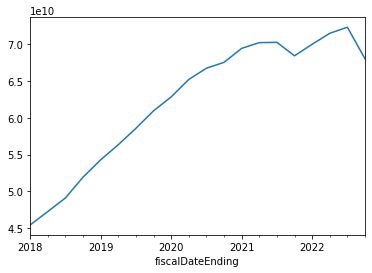

In [175]:
balance_sheet['accumulatedDepreciationAmortizationPPE'].plot()

In [156]:
balance_sheet

,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,...,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,367502000000,130053000000,45059000000,87940000000,7662000000,22408000000,416735000000,3.507700e+10,45425000000,...,122881000000,26756000000,46855000000,126878000000,None,91898000000,38044000000,4943282000,AAPL,BALANCE_SHEET
2018-06-30,USD,349197000000,115761000000,31971000000,70970000000,5936000000,26367000000,406209000000,3.811700e+10,47251000000,...,115871000000,25184000000,45694000000,114949000000,None,79436000000,38624000000,4842917000,AAPL,BALANCE_SHEET
2018-09-30,USD,365725000000,131339000000,25913000000,25913000000,3956000000,48995000000,234386000000,4.130400e+10,49099000000,...,220132000000,33327000000,48914000000,107147000000,None,70400000000,40201000000,4754986000,AAPL,BALANCE_SHEET
2018-12-31,USD,373719000000,140828000000,44771000000,86427000000,4988000000,36981000000,232891000000,3.959700e+10,51929000000,...,115529000000,36703000000,54555000000,117892000000,None,80510000000,40970000000,4729803000,AAPL,BALANCE_SHEET
2019-03-31,USD,341998000000,123346000000,37988000000,80092000000,4884000000,26278000000,218652000000,3.874600e+10,54290000000,...,112922000000,35368000000,52165000000,105860000000,None,64558000000,42801000000,4607284000,AAPL,BALANCE_SHEET
2019-06-30,USD,322239000000,134973000000,50530000000,94614000000,3355000000,26474000000,187266000000,3.763600e+10,56348000000,...,108059000000,31673000000,51143000000,96456000000,None,53724000000,43371000000,4531395000,AAPL,BALANCE_SHEET
2019-09-30,USD,338516000000,162819000000,48844000000,100557000000,4106000000,45804000000,175697000000,3.737800e+10,58579000000,...,209135000000,37720000000,50503000000,90488000000,None,45898000000,45174000000,4443236000,AAPL,BALANCE_SHEET
2019-12-31,USD,340618000000,163231000000,39771000000,107162000000,4097000000,39946000000,177387000000,3.703100e+10,60959000000,...,107861000000,36263000000,55848000000,89531000000,None,43977000000,45972000000,4384959000,AAPL,BALANCE_SHEET
2020-03-31,USD,320400000000,143753000000,40174000000,94051000000,3334000000,30677000000,176647000000,3.588900e+10,62854000000,...,107777000000,37324000000,56795000000,78425000000,None,33182000000,48032000000,4323987000,AAPL,BALANCE_SHEET


In [157]:
cash_flow

,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,15130000000,733000000,None,-26512000000,-24371000000,2739000000,4041000000,-28468000000,3241000000,...,0,0,None,-22429000000,None,17568000000,None,13822000000,AAPL,CASH_FLOW
2018-06-30,USD,14488000000,764000000,None,-649000000,1265000000,2665000000,3267000000,3946000000,-1693000000,...,1000000,0,None,-20782000000,None,-13088000000,None,11519000000,AAPL,CASH_FLOW
2018-09-30,USD,19523000000,902000000,None,21898000000,21040000000,2754000000,3041000000,22624000000,-1942000000,...,341000000,0,None,-18763000000,None,-6058000000,None,14125000000,AAPL,CASH_FLOW
2018-12-31,USD,26690000000,836000000,None,-8301000000,-10073000000,3395000000,3355000000,-12035000000,1076000000,...,0,0,None,-8796000000,None,18858000000,None,19965000000,AAPL,CASH_FLOW
2019-03-31,USD,11155000000,926000000,None,-15536000000,-10914000000,3040000000,2363000000,-10675000000,-70000000,...,390000000,0,None,-23312000000,None,11561000000,None,11561000000,AAPL,CASH_FLOW
2019-06-30,USD,11636000000,801000000,None,-5496000000,-2698000000,2933000000,2000000000,214000000,-1502000000,...,1000000,0,None,-16954000000,None,10044000000,None,10044000000,AAPL,CASH_FLOW
2019-09-30,USD,19910000000,860000000,None,22085000000,19925000000,3179000000,2777000000,19320000000,785000000,...,390000000,6963000000,None,-17054000000,None,24313000000,None,13686000000,AAPL,CASH_FLOW
2019-12-31,USD,30516000000,1120000000,None,5410000000,1165000000,2816000000,2107000000,-5917000000,28000000,...,2000000,2210000000,None,-20704000000,None,-8559000000,None,22236000000,AAPL,CASH_FLOW
2020-03-31,USD,13311000000,353000000,None,-10207000000,-8205000000,2786000000,1853000000,-9290000000,-727000000,...,428000000,0,None,-18146000000,None,10896000000,None,11249000000,AAPL,CASH_FLOW


In [158]:
# Calculate unlevered free cash flow (FCF)
operating_cash_flow = cash_flow['changeInOperatingLiabilities'] + cash_flow['changeInOperatingAssets']
capital_expenditures = balance_sheet['propertyPlantEquipment'] - balance_sheet['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
fcf_avg = fcf.mean()
fcf_avg

26853100000.0

In [164]:
# Calculate discount rate
cost_of_equity = risk_free_rate + beta * (market_return_rate - risk_free_rate)
cost_of_capital = cost_of_equity * (1 - tax_rate)

# Calculate present value of FCF
terminal_growth_rate = 0.03 # Can be adjusted based on expected industry growth rate
fcf_last_year = fcf.dropna().iloc[-1]

pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)])
pv_fcf += (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)]) \
    + (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

pv_fcf

422823757064.0191

In [167]:
# Calculate present value of terminal value
book_value = balance_sheet['totalShareholderEquity'] / balance_sheet['commonStockSharesOutstanding']
pv_terminal_value = book_value[-1] * (1 + terminal_growth_rate) / (cost_of_capital - terminal_growth_rate)

# Calculate intrinsic value
shares_outstanding = balance_sheet['commonStockSharesOutstanding'][-1]
intrinsic_value = (pv_fcf + pv_terminal_value) / shares_outstanding

# Calculate fair value per share
fair_value_per_share = intrinsic_value / df_bars['c'][df_bars.index.max()] # market_price_per_share would need to come from a separate data source

print('The estimated intrinsic value is:', intrinsic_value)
print('The estimated fair value per share is:', fair_value_per_share)


The estimated intrinsic value is: 26.68936337475111
The estimated fair value per share is: 0.1618518094284482


In [170]:
balance_sheet['commonStockSharesOutstanding'][-1]

15842407000

In [ ]:
# DCF calculation

import pandas as pd
import numpy as np

ticker = 'AAPL'

# Load data from CSV files
earning_calendar_12months = pd.read_csv('tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tech_companies_earning_calendar_3months.csv')
income_statements = pd.read_csv('tech_companies_income_statements.csv')
balance_sheet = pd.read_csv('tech_companies_balance_sheet.csv')
import pandas as pd

# load data
df_bars = pd.read_csv('bars_final.csv')
df_spy = pd.read_csv('bars_spy.csv')

# merge datasets based on time column
merged_data = pd.merge(df_bars, df_spy, on='time', how='left')

# calculate average returns for asset and market
asset_returns = merged_data['asset_close'].pct_change().mean()
market_returns = merged_data['spy_close'].pct_change().mean()

# calculate market variance
market_variance = merged_data['spy_close'].pct_change().var()

# calculate covariance
covariance = merged_data['asset_close'].pct_change().cov(merged_data['spy_close'].pct_change())

# calculate beta
beta = covariance / market_variance

print('Beta value is:', beta)


earning_calendar_12months = earning_calendar_12months[earning_calendar_12months['Ticker'] == ticker]
earning_calendar_6months = earning_calendar_6months[earning_calendar_6months['Ticker'] == ticker]
earning_calendar_3months = earning_calendar_3months[earning_calendar_3months['Ticker'] == ticker]
income_statements = income_statements[income_statements['Ticker'] == ticker]
balance_sheet = balance_sheet[balance_sheet['Ticker'] == ticker]

# Define variables for DCF analysis
risk_free_rate = 0.02 # Can be adjusted based on current bond rates
market_return_rate = 0.08 # Can be adjusted based on historical market returns
tax_rate = 0.21 # Can be adjusted based on effective corporate tax rate

# Merge dataframes on common ticker column
df = earning_calendar_12months.merge(earning_calendar_6months, on='Ticker', suffixes=('_12m', '_6m')) \
    .merge(earning_calendar_3months, on='Ticker') \
    .merge(income_statements, on=['Ticker', 'fiscalDateEnding']) \
    .merge(balance_sheet, on=['Ticker', 'fiscalDateEnding'])

# Calculate unlevered free cash flow (FCF)
operating_cash_flow = df['changeInOperatingLiabilities'] + df['changeInOperatingAssets']
capital_expenditures = df['propertyPlantEquipment'] - df['accumulatedDepreciationAmortizationPPE']
fcf = operating_cash_flow - capital_expenditures
fcf_avg = fcf.mean()

# Calculate discount rate
beta = ? # This would need to be obtained from a separate data source
cost_of_equity = risk_free_rate + beta * (market_return_rate - risk_free_rate)
cost_of_capital = cost_of_equity * (1 - tax_rate)

# Calculate present value of FCF
terminal_growth_rate = 0.03 # Can be adjusted based on expected industry growth rate
fcf_last_year = fcf[-1]
pv_fcf = sum([fcf_avg / (1 + cost_of_capital) ** i for i in range(1, len(fcf) + 1)]) \
    + (fcf_last_year * (1 + terminal_growth_rate)) / (cost_of_capital - terminal_growth_rate) / (1 + cost_of_capital) ** len(fcf)

# Calculate present value of terminal value
book_value = df['totalShareholderEquity'] / df['commonStockSharesOutstanding']
pv_terminal_value = book_value[-1] * (1 + terminal_growth_rate) / (cost_of_capital - terminal_growth_rate)

# Calculate intrinsic value
shares_outstanding = df['commonStockSharesOutstanding'][-1]
intrinsic_value = (pv_fcf + pv_terminal_value) / shares_outstanding

# Calculate fair value per share
fair_value_per_share = intrinsic_value / market_price_per_share # market_price_per_share would need to come from a separate data source

print('The estimated intrinsic value is:', intrinsic_value)
print('The estimated fair value per share is:', fair_value_per_share)


---


In [173]:
def dcf_fair_value(cash_flows, discount_rate, growth_rate, years, terminal_growth_rate=None):
    # Calculate discounted cash flows for the projection period
    future_cash_flows = [cash_flows * (1 + growth_rate)**i / (1 + discount_rate)**i for i in range(1, years + 1)]
    
    # Calculate the terminal value if provided
    if terminal_growth_rate is not None:
        terminal_value = (future_cash_flows[-1] * (1 + terminal_growth_rate)) / (discount_rate - terminal_growth_rate)
        future_cash_flows.append(terminal_value / (1 + discount_rate)**years)
    
    # Calculate the fair value
    fair_value = sum(future_cash_flows)
    return fair_value


In [176]:
cash_flow

,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,...,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Ticker,Report
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2018-03-31,USD,15130000000,733000000,None,-26512000000,-24371000000,2739000000,4041000000,-28468000000,3241000000,...,0,0,None,-22429000000,None,17568000000,None,13822000000,AAPL,CASH_FLOW
2018-06-30,USD,14488000000,764000000,None,-649000000,1265000000,2665000000,3267000000,3946000000,-1693000000,...,1000000,0,None,-20782000000,None,-13088000000,None,11519000000,AAPL,CASH_FLOW
2018-09-30,USD,19523000000,902000000,None,21898000000,21040000000,2754000000,3041000000,22624000000,-1942000000,...,341000000,0,None,-18763000000,None,-6058000000,None,14125000000,AAPL,CASH_FLOW
2018-12-31,USD,26690000000,836000000,None,-8301000000,-10073000000,3395000000,3355000000,-12035000000,1076000000,...,0,0,None,-8796000000,None,18858000000,None,19965000000,AAPL,CASH_FLOW
2019-03-31,USD,11155000000,926000000,None,-15536000000,-10914000000,3040000000,2363000000,-10675000000,-70000000,...,390000000,0,None,-23312000000,None,11561000000,None,11561000000,AAPL,CASH_FLOW
2019-06-30,USD,11636000000,801000000,None,-5496000000,-2698000000,2933000000,2000000000,214000000,-1502000000,...,1000000,0,None,-16954000000,None,10044000000,None,10044000000,AAPL,CASH_FLOW
2019-09-30,USD,19910000000,860000000,None,22085000000,19925000000,3179000000,2777000000,19320000000,785000000,...,390000000,6963000000,None,-17054000000,None,24313000000,None,13686000000,AAPL,CASH_FLOW
2019-12-31,USD,30516000000,1120000000,None,5410000000,1165000000,2816000000,2107000000,-5917000000,28000000,...,2000000,2210000000,None,-20704000000,None,-8559000000,None,22236000000,AAPL,CASH_FLOW
2020-03-31,USD,13311000000,353000000,None,-10207000000,-8205000000,2786000000,1853000000,-9290000000,-727000000,...,428000000,0,None,-18146000000,None,10896000000,None,11249000000,AAPL,CASH_FLOW


In [174]:
# Example inputs
cash_flows = 1000000  # Annual cash flow in USD
discount_rate = 0.1  # 10% discount rate
growth_rate = 0.05   # 5% annual growth rate
years = 5            # Projection period (5 years)
terminal_growth_rate = 0.02  # 2% terminal growth rate

fair_value = dcf_fair_value(cash_flows, discount_rate, growth_rate, years, terminal_growth_rate)
print(f"Fair value: ${fair_value:.2f}")


Fair value: $10631908.68


---

In [ ]:
import pandas as pd

earning_calendar_12months = pd.read_csv('tc_data/tech_companies_earning_calendar_12months.csv')
earning_calendar_6months = pd.read_csv('tc_data/tech_companies_earning_calendar_6months.csv')
earning_calendar_3months = pd.read_csv('tc_data/tech_companies_earning_calendar_3months.csv')

tech_companies_income_statements_df = pd.read_csv('tc_data/tech_companies_income_statements.csv')
tech_companies_balance_sheet_df = pd.read_csv('tc_data/tech_companies_balance_sheet.csv')
tech_companies_cash_flow_df = pd.read_csv('tc_data/tech_companies_cash_flow.csv')

# Extract the necessary data
earnings = tech_companies_earning_df[['Ticker', 'Report', 'fiscalDateEnding', 'reportedEPS']]
income_statements = tech_companies_income_statements_df[['Ticker', 'Report', 'fiscalDateEnding', 'totalRevenue', 'grossProfit', 'operatingIncome', 'netIncome']]
balance_sheet = tech_companies_balance_sheet_df[['Ticker', 'Report', 'fiscalDateEnding', 'totalAssets', 'totalCurrentAssets', 'totalCurrentLiabilities', 'totalShareholderEquity', 'shortLongTermDebtTotal']]
cash_flow = tech_companies_cash_flow_df[['Ticker', 'Report', 'fiscalDateEnding', 'operatingCashflow', 'capitalExpenditures']]

# Merge DataFrames
financial_data = earnings.merge(income_statements, on=['Ticker', 'Report', 'fiscalDateEnding']).merge(balance_sheet, on=['Ticker', 'Report', 'fiscalDateEnding']).merge(cash_flow, on=['Ticker', 'Report', 'fiscalDateEnding'])

# Calculate financial metrics
financial_data['P/E'] = financial_data['Report'] / financial_data['reportedEPS']
financial_data['P/S'] = financial_data['Report'] / (financial_data['totalRevenue'] / financial_data['totalShareholderEquity'])
financial_data['P/B'] = financial_data['Report'] / (financial_data['totalShareholderEquity'] / financial_data['totalShareholderEquity'])
financial_data['Dividend_Yield'] = None  # Assuming no dividend data available
financial_data['EPS_Growth'] = financial_data['reportedEPS'].pct_change()
financial_data['ROE'] = financial_data['netIncome'] / financial_data['totalShareholderEquity']
financial_data['ROA'] = financial_data['netIncome'] / financial_data['totalAssets']
financial_data['Gross_Margin'] = financial_data['grossProfit'] / financial_data['totalRevenue']
financial_data['Operating_Margin'] = financial_data['operatingIncome'] / financial_data['totalRevenue']
financial_data['Net_Profit_Margin'] = financial_data['netIncome'] / financial_data['totalRevenue']
financial_data['Current_Ratio'] = financial_data['totalCurrentAssets'] / financial_data['totalCurrentLiabilities']
financial_data['Debt_to_Equity'] = financial_data['shortLongTermDebtTotal'] / financial_data['totalShareholderEquity']
financial_data['FCF'] = financial_data['operatingCashflow'] - financial_data['capitalExpenditures']
financial_data['Cash_Conversion_Cycle'] = None  # Requires additional inventory data
financial_data['EV/EBITDA'] = None  # Requires additional data for enterprise value calculation

# Check the resulting DataFrame
print(financial_data)


---